In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

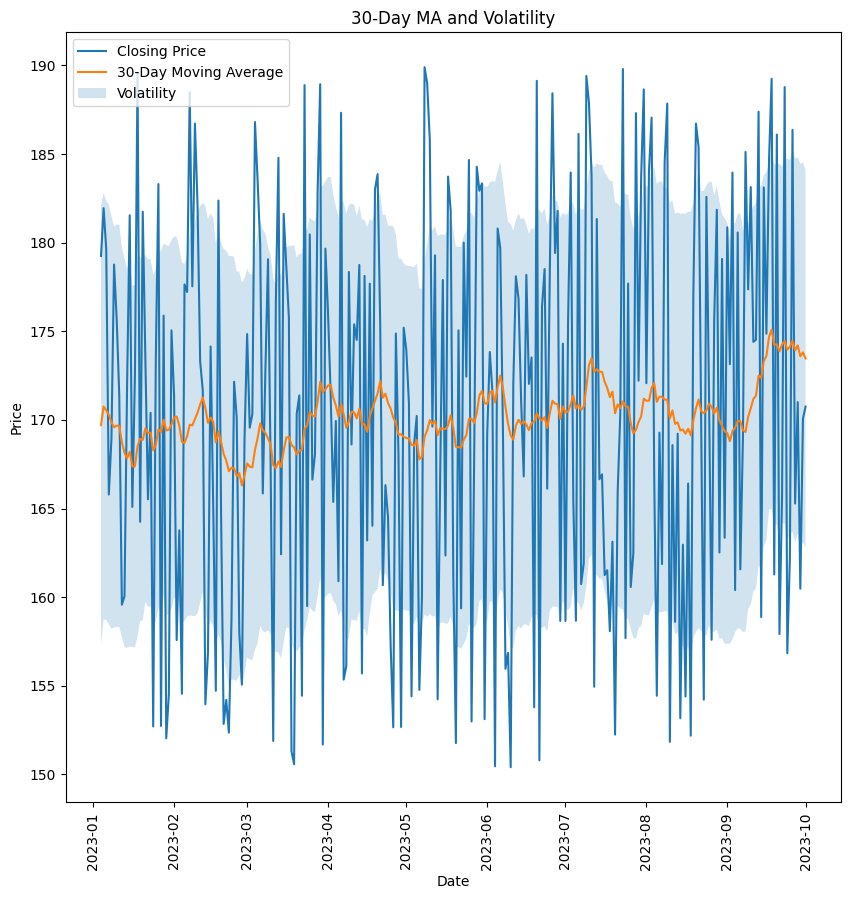

In [8]:
# ---
# Group No. 1
# 1. นาย พศิน บุญชู 6410450532
# 2. นาย ณัฐภัทร ภารกุล 6410451644
# 3. นาย นิธิภัทร เบญจม์ภัทร 6410451725
# ---

group = 1 # กลุ่มที่ 1
problem = 1 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# เปลี่ยน ข้อมูลใน columns [Date] เป็ยวันที่
data['Date'] = pd.to_datetime(data['Date'])
# คำนวน 30ma ในแต่ละ colums
data['30MA'] = data['Close'].rolling(window=30).mean()
# คำนวน Volatility ในแต่ละ colums
data['Volatility'] = data['Close'].rolling(window=30).std()

#ลบ 30 วันแรก ออก เพราะ 30ma จะไม่มี 30 วันแรก
data.drop(index=range(0,29), inplace=True)

# คำนวน คำผันผวน สูงสุด
upper = data['30MA']+data['Volatility']
# คำนวน คำผันผวน ต่ำสุด
lower = data['30MA']-data['Volatility']


#สร้างกราฟ
# กำหนดขนาดกราฟ
plt.figure(figsize=(10,10))
# สร้างกราฟ เส้น แสดง ราคาปิด และ 30ma
plt.plot(data["Date"], data["Close"], label="Closing Price")
plt.plot(data["Date"], data["30MA"], label="30-Day Moving Average")
# สร้าง แสดง พื้นของค่า ผันผวน
plt.fill_between(data['Date'],lower,upper, alpha=0.2,label='Volatility')

# กำหนด หัวข้อกราฟ
plt.xticks(rotation=90) # หมุนข้อความในแกน x
plt.xlabel("Date") # ชื่อแกน x
plt.ylabel("Price") # ชื่อแกน y
plt.title("30-Day MA and Volatility") # ชื่อกราฟ
plt.legend(loc='best',fontsize=10) # สร้างกล่องข้อความแสดง บอกชื่อเส้นกราฟ

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()